# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
test_cities = ["New York","Chicago","Los Angeles"]
query_url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="      
#print(query_url + test_cities[1])
weather_info = []
#for x in test_cities:
for x in cities:
    url = query_url + x
    result = requests.get(url).json()
  #  print(result)
    try:
        weather = {
            "City": result["name"] , 
            "Lat": result["coord"]["lat"],
            "Lng": result["coord"]["lon"],
            "Max Temp": result["main"]["temp_max"],
            "Humidity": result["main"]["humidity"],
            "Cloudiness": result["clouds"]["all"],
            "Wind Speed": result["wind"]["speed"],
            "Country": result["sys"]["country"],
            "Date": result["dt"],
        }
        weather_info.append(weather)
    except:
        print(f"{x} not found")
    
weather_info





nizhneyansk not found
vaitupu not found
alotau not found
illoqqortoormiut not found
paradwip not found
mys shmidta not found
taolanaro not found
amderma not found
samusu not found
tsihombe not found
grand river south east not found
sataua not found
barentsburg not found
cockburn harbour not found
belushya guba not found
attawapiskat not found
burica not found
ijaki not found
meyungs not found
zhanatas not found
lolua not found
umzimvubu not found
taburi not found
chagda not found
tumannyy not found
sentyabrskiy not found
babanusah not found
solovetskiy not found
karaul not found
tawkar not found
jiddah not found
labutta not found
mullaitivu not found
chaa-khol not found
yefimovskiy not found
marcona not found
ust-kamchatsk not found
palabuhanratu not found
saleaula not found
toliary not found
tabiauea not found
wulanhaote not found
utiroa not found
khonuu not found
ngukurr not found
gulshat not found
samalaeulu not found


[{'City': 'Rome',
  'Lat': 43.21,
  'Lng': -75.46,
  'Max Temp': 51.01,
  'Humidity': 81,
  'Cloudiness': 90,
  'Wind Speed': 3.53,
  'Country': 'US',
  'Date': 1592138886},
 {'City': 'Chokurdakh',
  'Lat': 70.63,
  'Lng': 147.92,
  'Max Temp': 64.18,
  'Humidity': 53,
  'Cloudiness': 67,
  'Wind Speed': 8.81,
  'Country': 'RU',
  'Date': 1592138967},
 {'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.33,
  'Max Temp': 55.99,
  'Humidity': 93,
  'Cloudiness': 61,
  'Wind Speed': 9.06,
  'Country': 'AU',
  'Date': 1592138968},
 {'City': 'Hirara',
  'Lat': 24.8,
  'Lng': 125.28,
  'Max Temp': 83.53,
  'Humidity': 86,
  'Cloudiness': 0,
  'Wind Speed': 11.65,
  'Country': 'JP',
  'Date': 1592138968},
 {'City': 'Zhigansk',
  'Lat': 66.77,
  'Lng': 123.37,
  'Max Temp': 53.11,
  'Humidity': 79,
  'Cloudiness': 76,
  'Wind Speed': 12.55,
  'Country': 'RU',
  'Date': 1592138969},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 26.6,
  'Humidity': 79,
  'Cloudiness': 35,
 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_info)
weather_df
weather_df.to_csv(output_data_file, index=False)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rome,43.21,-75.46,51.01,81,90,3.53,US,1592138886
1,Chokurdakh,70.63,147.92,64.18,53,67,8.81,RU,1592138967
2,Busselton,-33.65,115.33,55.99,93,61,9.06,AU,1592138968
3,Hirara,24.80,125.28,83.53,86,0,11.65,JP,1592138968
4,Zhigansk,66.77,123.37,53.11,79,76,12.55,RU,1592138969


In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,19.645263,19.419568,68.956654,66.742481,47.687970,8.358910,1.592139e+09
std,32.968088,93.616990,16.658671,23.438734,39.568059,5.348626,9.184801e+01
min,-54.800000,-179.170000,26.600000,3.000000,0.000000,0.400000,1.592138e+09
25%,-6.257500,-64.150000,56.665000,54.000000,1.000000,4.225000,1.592139e+09
50%,22.630000,25.600000,71.600000,73.000000,40.500000,7.135000,1.592139e+09
75%,46.445000,102.667500,80.600000,85.250000,90.000000,11.410000,1.592139e+09
max,78.220000,179.320000,115.030000,100.000000,100.000000,31.090000,1.592139e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_over = weather_df.loc[weather_df["Humidity"] > 100]
#humidity_over.head()

humidity_over.index[humidity_over['Humidity']].tolist()
humidity_over.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.loc[weather_df["Humidity"] <= 100]


In [9]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
#output_data_file_2 = "output_data/city_data.csv"

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

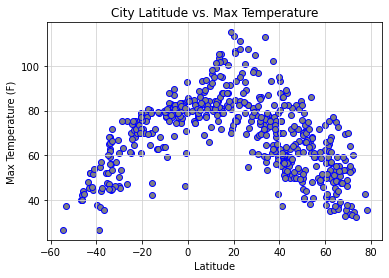

In [11]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="blue",facecolors="gray")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

# As you get farther away from 0 latitude, the teperature either gets warmer or colder.

## Latitude vs. Humidity Plot

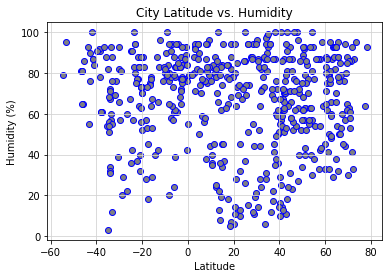

In [12]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="blue",facecolors="gray")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()


#  Humidity can reach 100% during the heat or cold

## Latitude vs. Cloudiness Plot

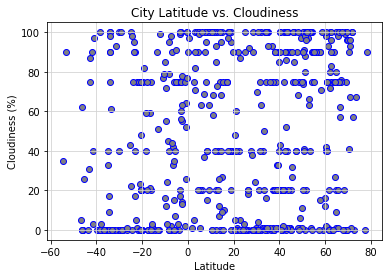

In [13]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="blue",facecolors="gray")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig3.png")
plt.show()

#Cloudiness does not follow latitude

## Latitude vs. Wind Speed Plot

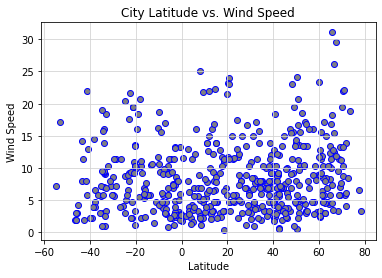

In [14]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="blue",facecolors="gray")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig4.png")
plt.show()

# Wind speed is has is highest in higher latitude

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_city_data.loc[clean_city_data["Lng"] >= 0]
northern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Chokurdakh,70.63,147.92,64.18,53,67,8.81,RU,1592138967
2,Busselton,-33.65,115.33,55.99,93,61,9.06,AU,1592138968
3,Hirara,24.80,125.28,83.53,86,0,11.65,JP,1592138968
4,Zhigansk,66.77,123.37,53.11,79,76,12.55,RU,1592138969
6,Hambantota,6.12,81.12,93.20,59,20,16.11,LK,1592138884
...,...,...,...,...,...,...,...,...,...
523,Ryōtsu-minato,38.08,138.43,71.60,100,90,10.29,JP,1592139150
524,Tazovsky,67.47,78.70,47.53,60,100,29.64,RU,1592139151
526,Drabiv,49.96,32.15,75.69,75,11,14.34,UA,1592139151
527,Sharlyk,52.92,54.75,63.54,57,63,13.40,RU,1592139152


In [16]:
# Create Northern and Southern Hemisphere DataFrames
southern = clean_city_data.loc[clean_city_data["Lng"] < 0]
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rome,43.21,-75.46,51.01,81,90,3.53,US,1592138886
5,Ushuaia,-54.80,-68.30,26.60,79,35,7.27,AR,1592138969
7,Vaini,-21.20,-175.20,69.80,83,75,9.17,TO,1592138970
9,Saint George,37.10,-113.58,64.40,17,1,6.93,US,1592138970
11,Lagoa,39.05,-27.98,61.56,72,33,11.97,PT,1592138972
...,...,...,...,...,...,...,...,...,...
518,Mayo,38.89,-76.51,64.99,59,20,9.17,US,1592139026
525,Barcelos,41.54,-8.62,70.00,72,20,8.05,PT,1592139151
529,Moengo,5.62,-54.40,83.17,70,63,3.96,SR,1592139152
530,Campoverde,-8.48,-74.81,75.20,94,40,4.70,PE,1592139153


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is: -0.06158795241740715
Regression line is: y = -0.03x + 73.33


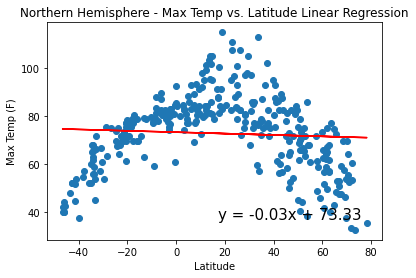

In [17]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is: -0.2765686780540838
Regression line is: y = -0.14x + 66.67


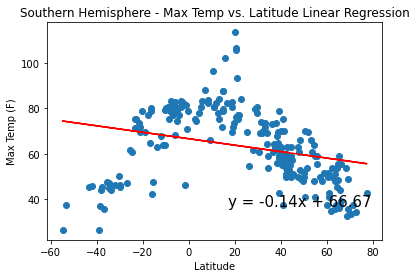

In [18]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is: -0.1258203000906979
Regression line is: y = -0.09x + 64.09


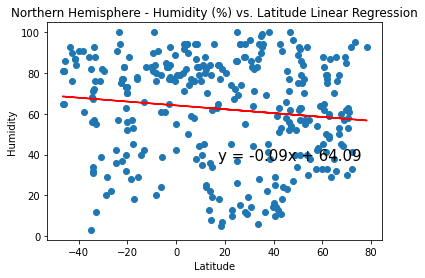

In [19]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is: -0.005464505322666806
Regression line is: y = -0.0x + 72.94


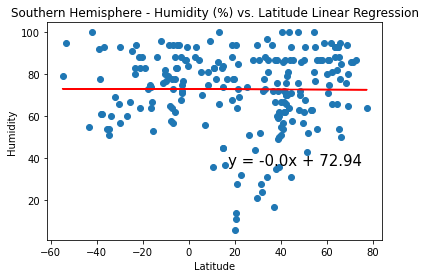

In [20]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is: 0.1689895097864201
Regression line is: y = 0.2x + 49.0


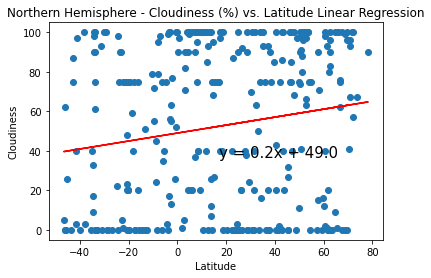

In [21]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is: 0.1545935734674202
Regression line is: y = 0.18x + 36.66


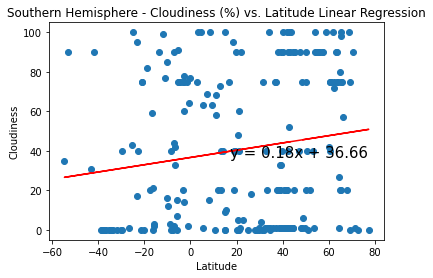

In [22]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is: 0.1037514978161639
Regression line is: y = 0.02x + 8.28


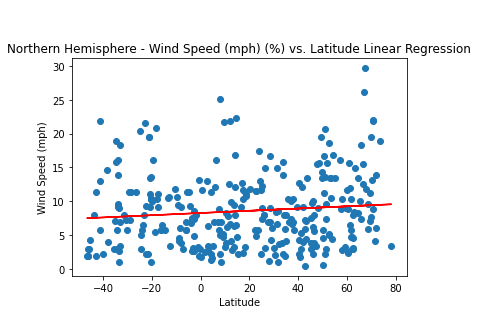

In [23]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Wind Speed (mph) (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared is: 0.09761920623440616
Regression line is: y = 0.02x + 7.69


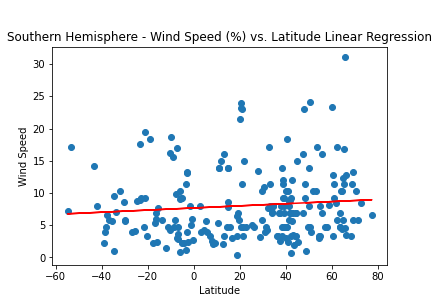

In [24]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"R-squared is: {rvalue}")
print(f"Regression line is: {line_eq}")


plt.show()